## Multiple classification on Leaf dataset by Decision Tree, KNN, SVM, ANN, and Boosting

### load helper functions from modules

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, scale
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import GridSearchCV
from sklearn.learning_curve import learning_curve
import pylab as pl
import time
from sklearn.cross_validation import cross_val_score
%matplotlib inline

### import five classifiers

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

In [3]:
print("sklearn version:",sk.__version__)
print("numpy version:",np.__version__)
print("matplotlib version:",matplotlib.__version__)
print("pandas version:",pd.__version__)

sklearn version: 0.19.0
numpy version: 1.13.1
matplotlib version: 2.0.2
pandas version: 0.20.3


### load leaf data

In [4]:
leaf = pd.read_csv("leaf.csv")

### quick look on data

In [5]:
print("data shapes: ", leaf.shape)

data shapes:  (990, 194)


In [6]:
leaf.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [7]:
leaf.head(5)

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


### In this dataset, diagnosis is class column. id column is not related to diagnosis, and Unnamed: 32 column is all NaNs. So I will drop these two columns. 

In [8]:
leaf = leaf.drop(['id'],axis=1)

### split features and labels

In [9]:
features, labels= leaf.drop(["species"],axis=1),leaf.species

### let's see the numbers of each labels and number of features

In [10]:
print(labels.value_counts())
print()
print("Number of features:",features.shape[1])

Ginkgo_Biloba                  10
Populus_Grandidentata          10
Quercus_Crassifolia            10
Sorbus_Aria                    10
Quercus_Rhysophylla            10
Quercus_Crassipes              10
Lithocarpus_Cleistocarpus      10
Quercus_Vulcanica              10
Quercus_Phellos                10
Acer_Opalus                    10
Cytisus_Battandieri            10
Eucalyptus_Glaucescens         10
Quercus_Palustris              10
Quercus_Nigra                  10
Betula_Pendula                 10
Celtis_Koraiensis              10
Acer_Palmatum                  10
Quercus_Trojana                10
Ilex_Cornuta                   10
Quercus_Texana                 10
Cornus_Chinensis               10
Rhododendron_x_Russellianum    10
Prunus_X_Shmittii              10
Quercus_Greggii                10
Pterocarya_Stenoptera          10
Acer_Platanoids                10
Magnolia_Salicifolia           10
Acer_Pictum                    10
Liquidambar_Styraciflua        10
Quercus_Pontic

### data is balanced but size is small. let's see what we can get if we run all default classifiers on the raw data

### since sample size is small, I randomly split train and test data with stratification. 80% of data are used as trainning set, and 20% as test set.

In [11]:
strat_shuffle_split = StratifiedShuffleSplit(labels, 10, test_size=0.2, random_state=88)

for train_index, test_index in strat_shuffle_split:
    X_train, X_test = features.values[train_index], features.values[test_index]
    y_train, y_test = labels.values[train_index], labels.values[test_index]

### verify the shape of data after stratifiedshufflesplit

In [12]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((792, 192), (792,), (198, 192), (198,))

### Let's create classifier instances

In [13]:
classifiers = [
    KNeighborsClassifier(), #KNN
    SVC(random_state=66),#SVM
    MLPClassifier(solver="sgd",random_state=10),#ANN
    DecisionTreeClassifier(criterion="entropy",random_state=66),# Default Entropy Decision Tree
    AdaBoostClassifier(random_state=88),#Boosting
    ]

### Using default classifiers trained on whole train set, and get train and test accuracy and running time for training and prediction. I run ten times and get average of all performances

In [14]:
log_cols=["Classifier", "Train_Accuracy","Test_Accuracy", "Training_time", "Prediction_time_on_test"]
starting_performance = pd.DataFrame(columns = log_cols)
repeat = 10

for clf in classifiers:
    name = clf.__class__.__name__
    print("="*30)
    print(name)

    train_acc = []
    test_acc = []
    training_time = []
    prediction_time_on_test  = []
    
    for _ in range(repeat):
        
        start1 = time.time()
        clf.fit(X_train, y_train)
        training_time.append(time.time() - start1)
        
        train_predictions = clf.predict(X_train)
        train_acc.append(accuracy_score(y_train, train_predictions))

        start2 = time.time()
        test_predictions = clf.predict(X_test)
        prediction_time_on_test.append(time.time() - start2)
        
        test_acc.append(accuracy_score(y_test, test_predictions))


    log_entry = pd.DataFrame([[name, np.mean(train_acc)*100, np.mean(test_acc)*100, np.mean(training_time), np.mean(prediction_time_on_test)]], columns=log_cols)
    starting_performance = starting_performance.append(log_entry)
starting_performance = starting_performance.reset_index(drop=True)
print("="*30)

KNeighborsClassifier
SVC
MLPClassifier
DecisionTreeClassifier
AdaBoostClassifier


### Let's see the starting performances of each classifiers

In [15]:
starting_performance

,Classifier,Train_Accuracy,Test_Accuracy,Training_time,Prediction_time_on_test
0,KNeighborsClassifier,91.287879,87.373737,0.004827,0.049497
1,SVC,84.722222,80.808081,0.339102,0.051567
2,MLPClassifier,1.893939,1.010101,0.056197,0.000401
3,DecisionTreeClassifier,100.000000,64.646465,0.835072,0.000000
4,AdaBoostClassifier,4.040404,4.040404,1.113305,0.027374


### From breast cancer study, we know we'd better standardize all feature columns, and run data split and performance evaluations. 

In [16]:
features_scaled = scale(features)

strat_shuffle_split = StratifiedShuffleSplit(labels, 10, test_size=0.2, random_state=88)

for train_index, test_index in strat_shuffle_split:
    X_train, X_test = features_scaled[train_index], features_scaled[test_index]
    y_train, y_test = labels.values[train_index], labels.values[test_index]

In [17]:
log_cols=["Classifier", "Train_Accuracy","Test_Accuracy", "Training_time", "Prediction_time_on_test"]
performance_after_scale = pd.DataFrame(columns = log_cols)
repeat = 10

for clf in classifiers:
    name = clf.__class__.__name__
    print("="*30)
    print(name)

    train_acc = []
    test_acc = []
    training_time = []
    prediction_time_on_test  = []
    
    for _ in range(repeat):
        
        start1 = time.time()
        clf.fit(X_train, y_train)
        training_time.append(time.time() - start1)
        
        train_predictions = clf.predict(X_train)
        train_acc.append(accuracy_score(y_train, train_predictions))

        start2 = time.time()
        test_predictions = clf.predict(X_test)
        prediction_time_on_test.append(time.time() - start2)
        
        test_acc.append(accuracy_score(y_test, test_predictions))


    log_entry = pd.DataFrame([[name, np.mean(train_acc)*100, np.mean(test_acc)*100, np.mean(training_time), np.mean(prediction_time_on_test)]], columns=log_cols)
    performance_after_scale = performance_after_scale.append(log_entry)
performance_after_scale = performance_after_scale.reset_index(drop=True)
print("="*30)

KNeighborsClassifier
SVC
MLPClassifier
DecisionTreeClassifier
AdaBoostClassifier


In [18]:
performance_after_scale

,Classifier,Train_Accuracy,Test_Accuracy,Training_time,Prediction_time_on_test
0,KNeighborsClassifier,98.232323,95.959596,0.007805,0.050934
1,SVC,99.621212,98.484848,0.352373,0.053246
2,MLPClassifier,97.601010,91.919192,2.125156,0.000100
3,DecisionTreeClassifier,100.000000,65.151515,0.782557,0.000000
4,AdaBoostClassifier,4.040404,4.040404,1.281864,0.030263


### After scaling data, performances of KNN, SVM and ANN are dramtically improved. But Decision tree and Boosting are not affected. We have to optimize them in other ways.

### let's use cross validation to find best hyperparameters for the five classifiers.
## First, KNN. I use GridSearchCV to find best value for "n_neighbors"

In [19]:
knn=KNeighborsClassifier()
knn_paras={"n_neighbors":[i for i in range(10,0,-1)]}
gscv_KNN=GridSearchCV(knn, knn_paras,cv=4,n_jobs=2)
gscv_KNN.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'n_neighbors': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

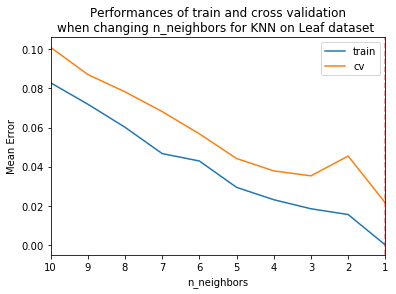

In [20]:
resKNN = gscv_KNN.cv_results_
resKNNpd = pd.DataFrame(knn_paras)
resKNNpd["train"] = 1-np.array(resKNN['mean_train_score'])
resKNNpd["cv"] =1-np.array(resKNN['mean_test_score'])

resKNNpd.n_neighbors = resKNNpd.n_neighbors.astype(str)
resKNNpd=resKNNpd.set_index(["n_neighbors"])

ax=resKNNpd.plot(title="Performances of train and cross validation\nwhen changing n_neighbors for KNN on Leaf dataset ")
ax.set_ylabel("Mean Error")
idxmin = [i for i in range(resKNNpd.shape[0]) if resKNNpd.index[i] == resKNNpd.idxmin()['cv']]
ax.axvline(x=idxmin[0],color='r',ls='--',alpha=0.5)
plt.savefig("complex-error_KNN_leaf.png")

### Best value of  parameter  "n_neighbors" for KNN is 1

In [21]:
best_KNN = KNeighborsClassifier(n_neighbors=1)


## Let's work on SVC. I worked on hyperparameter "C" and "gamma"

In [22]:
svc=SVC(random_state=66)
svc_paras={"C":[1000,300,100,30,10,3,1,0.3],"gamma":[0.03,0.01,0.003,0.001,0.0003,0.0001,0.00003,0.00001]}
gscvSVM=GridSearchCV(svc, svc_paras,cv=4,n_jobs=2)
gscvSVM.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=66, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'gamma': [0.03, 0.01, 0.003, 0.001, 0.0003, 0.0001, 3e-05, 1e-05], 'C': [1000, 300, 100, 30, 10, 3, 1, 0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

The best classifier is:  SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.003, kernel='rbf',
  max_iter=-1, probability=False, random_state=66, shrinking=True,
  tol=0.001, verbose=False)


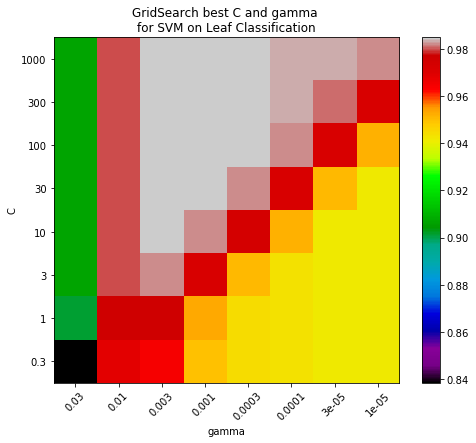

In [23]:
print("The best classifier is: ", gscvSVM.best_estimator_)


score_dict = gscvSVM.grid_scores_


scores = [x[1] for x in score_dict]
scores = np.array(scores).reshape(8,8)

title="GridSearch best C and gamma \nfor SVM on Leaf Classification"
pl.figure(figsize=(8, 6))
pl.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
pl.imshow(scores, interpolation='nearest', cmap=pl.cm.spectral)
pl.xlabel('gamma')
pl.ylabel('C')
pl.title(title)
pl.colorbar()
pl.xticks(np.arange(8), [0.03,0.01,0.003,0.001,0.0003,0.0001,0.00003,0.00001], rotation=45)
pl.yticks(np.arange(8), [1000,300,100,30,10,3,1,0.3])
pl.savefig("gridsearchSVCleaf.png")

### Let's draw  validation curve only for "C" for better visulization

In [24]:
svc1=SVC(gamma=0.003,random_state=66)
svc_paras={"C":[0.3,1,3,10,30,100,300,1000]}
gscvSVM=GridSearchCV(svc1, svc_paras,cv=4,n_jobs=2)
gscvSVM.fit(X_train, y_train)
resSVM = gscvSVM.cv_results_
resSVMpd = pd.DataFrame(svc_paras)
resSVMpd["train"] = 1-np.array(resSVM['mean_train_score'])
resSVMpd["cv"] =1-np.array(resSVM['mean_test_score'])

resSVMpd.C = resSVMpd.C.astype(str)
resSVMpd=resSVMpd.set_index(["C"])

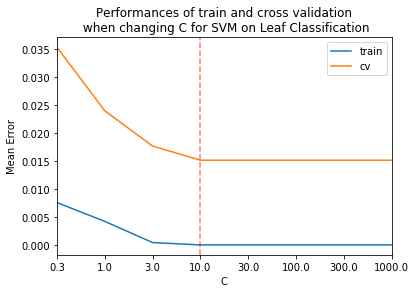

In [25]:
ax=resSVMpd.plot(title="Performances of train and cross validation\n when changing C for SVM on Leaf Classification")
ax.set_ylabel("Mean Error")
idxmin = [i for i in range(resSVMpd.shape[0]) if resSVMpd.index[i] == resSVMpd.idxmin()['cv']]
ax.axvline(x=idxmin[0],color='r',ls='--',alpha=0.5)
plt.savefig("complex-error_SVMleaf.png")

### Let's draw validation curve only for "gamma" for better visulization

In [26]:
svc2 = SVC(C=10,random_state=66)
svc_paras = {"gamma":[0.00001,0.00003,0.0001,0.0003,0.001,0.003,0.01,0.03]}
gscvSVM2 = GridSearchCV(svc2, svc_paras,cv=4,n_jobs=2)
gscvSVM2.fit(X_train, y_train)
resSVM2 = gscvSVM2.cv_results_
resSVMpd2 = pd.DataFrame(svc_paras)
resSVMpd2["train"] = 1-np.array(resSVM2['mean_train_score'])
resSVMpd2["cv"] =1-np.array(resSVM2['mean_test_score'])
#resSVMpd["C"]=resSVMpd["C"].apply(str)
resSVMpd2.gamma = resSVMpd2.gamma.astype(str)
resSVMpd2=resSVMpd2.set_index(["gamma"])

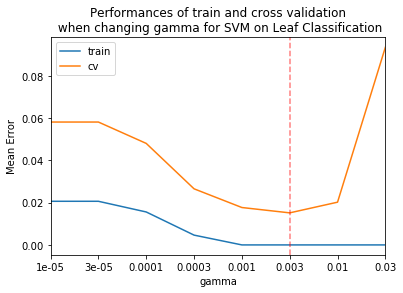

In [27]:
ax=resSVMpd2.plot(title="Performances of train and cross validation\n when changing gamma for SVM on Leaf Classification")
ax.set_ylabel("Mean Error")
idxmin = [i for i in range(resSVMpd2.shape[0]) if resSVMpd2.index[i] == resSVMpd2.idxmin()['cv']]
ax.axvline(x=idxmin[0],color='r',ls='--',alpha=0.5)
plt.savefig("complex-error_SVMleaf2.png")

In [28]:
svc3 = SVC(C=10,gamma=0.003,random_state=66)
svc_paras = {"max_iter":[2,5,10,20,40,60]}
gscvSVM2 = GridSearchCV(svc3, svc_paras,cv=4,n_jobs=2)
gscvSVM2.fit(X_train, y_train)
resSVM2 = gscvSVM2.cv_results_
resSVMpd2 = pd.DataFrame(svc_paras)
resSVMpd2["train"] = 1-np.array(resSVM2['mean_train_score'])
resSVMpd2["cv"] =1-np.array(resSVM2['mean_test_score'])
resSVMpd2.max_iter = resSVMpd2.max_iter.astype(str)
resSVMpd2=resSVMpd2.set_index(["max_iter"])

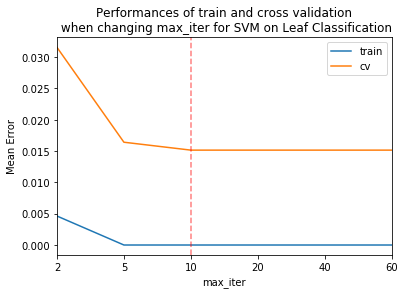

In [29]:
ax=resSVMpd2.plot(title="Performances of train and cross validation\n when changing max_iter for SVM on Leaf Classification")
ax.set_ylabel("Mean Error")
idxmin = [i for i in range(resSVMpd2.shape[0]) if resSVMpd2.index[i] == resSVMpd2.idxmin()['cv']]
ax.axvline(x=idxmin[0],color='r',ls='--',alpha=0.5)
plt.savefig("complex-error_SVMleaf3.png")

In [30]:
gscvSVM2.best_score_

0.98484848484848486

### The best cross validation score from rbf kernel is shown above. 
### Let's see if we switch kernel to linear, and most critical value for linear SVM is C. 

In [31]:
svc=SVC(kernel="linear",random_state=66)
svc_paras={"C":[0.003,0.01,0.03,0.1,0.3,1,3,10,30]}
gscvSVMl=GridSearchCV(svc, svc_paras,cv=5,n_jobs=2)
gscvSVMl.fit(X_train, y_train)
resSVM3 = gscvSVMl.cv_results_
resSVMpd3 = pd.DataFrame(svc_paras)
resSVMpd3["train"] = 1-np.array(resSVM3['mean_train_score'])
resSVMpd3["cv"] =1-np.array(resSVM3['mean_test_score'])
resSVMpd3.C = resSVMpd3.C.astype(str)
resSVMpd3=resSVMpd3.set_index(["C"])

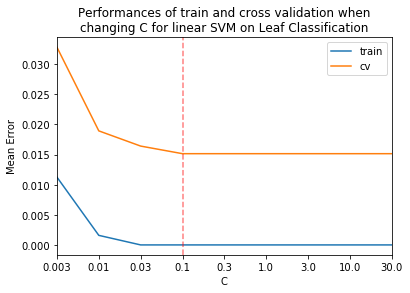

In [32]:
ax=resSVMpd3.plot(title="Performances of train and cross validation when\nchanging C for linear SVM on Leaf Classification")
ax.set_ylabel("Mean Error")
idxmin = [i for i in range(resSVMpd3.shape[0]) if resSVMpd3.index[i] == resSVMpd3.idxmin()['cv']]
ax.axvline(x=idxmin[0],color='r',ls='--',alpha=0.5)
plt.savefig("complex-error_SVMlf4.png")

In [33]:
gscvSVMl.best_score_

0.98484848484848486

### So linear kernal can achieve same performance as rbf kernal on Leaf Classification

### From above grid search, the following classifiers are the best SVC classifers working on leaf classification from above analysis, I will compare them agian in final performance section

In [34]:
best_SVC1 = SVC(C=10,gamma=0.003,random_state=66)
best_SVC2 = SVC(kernel="linear",C=0.1,random_state=66)

## Next, I worked on decision tree classifier
### We can tune two parameters "max_depth" and "min_samples_sp" for pre pruning of decision tree.
### let's see the validation curves on  "max_depth" or "min_samples_split"

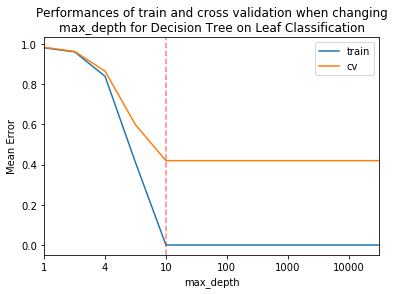

In [35]:
dtc_paras={"max_depth":[1,2,4,6,10,30,100,300,1000,3000,10000,30000]}
resTreepd = pd.DataFrame(dtc_paras)

dtc=DecisionTreeClassifier(criterion = "entropy",random_state=66)
gscvTree=GridSearchCV(dtc, dtc_paras,cv=4,n_jobs=2)
gscvTree.fit(X_train, y_train)
resTree = gscvTree.cv_results_
resTreepd["train"] = 1-np.array(resTree['mean_train_score'])
resTreepd["cv"] = 1-np.array(resTree['mean_test_score'])

resTreepd.max_depth = resTreepd.max_depth.astype(str)
resTreepd=resTreepd.set_index(["max_depth"])
ax=resTreepd.plot(title="Performances of train and cross validation when changing\nmax_depth for Decision Tree on Leaf Classification")
ax.set_ylabel("Mean Error")
idxmin = [i for i in range(resTreepd.shape[0]) if resTreepd.index[i] == resTreepd.idxmin()['cv']]
ax.axvline(x=idxmin[0],color='r',ls='--',alpha=0.5)
plt.savefig("complex-error_Treeleaf1.png")

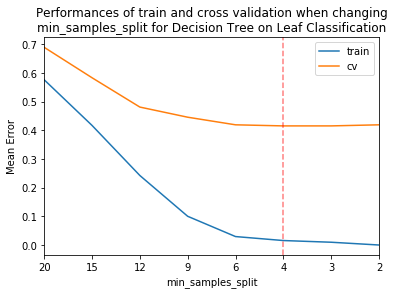

In [36]:
dtc_paras={"min_samples_split":[20,15,12,9,6,4,3,2]}
resTreepd = pd.DataFrame(dtc_paras)

dtc2=DecisionTreeClassifier(criterion = "entropy",max_depth=10,random_state=66)
gscvTree=GridSearchCV(dtc2, dtc_paras,cv=4,n_jobs=2)
gscvTree.fit(X_train, y_train)
resTree = gscvTree.cv_results_
resTreepd["train"] = 1-np.array(resTree['mean_train_score'])
resTreepd["cv"] = 1-np.array(resTree['mean_test_score'])

resTreepd.min_samples_split = resTreepd.min_samples_split.astype(str)
resTreepd=resTreepd.set_index(["min_samples_split"])
ax=resTreepd.plot(title="Performances of train and cross validation when changing\nmin_samples_split for Decision Tree on Leaf Classification")
ax.set_ylabel("Mean Error")
idxmin = [i for i in range(resTreepd.shape[0]) if resTreepd.index[i] == resTreepd.idxmin()['cv']]
ax.axvline(x=idxmin[0],color='r',ls='--',alpha=0.5)
plt.savefig("complex-error_Treeleaf2.png")

### The best decision tree classifier from above analysis is:

In [37]:
best_tree = DecisionTreeClassifier(criterion = "entropy",max_depth=10,min_samples_split=4,random_state=66)

## Tune parameters for boosting

### First tune learning rate

In [38]:
boost=AdaBoostClassifier(random_state=88)
boost_paras={"learning_rate":[1,0.3,0.1,0.05,0.03,0.015,0.01,0.003,0.001,0.0001]}
gscvBoost=GridSearchCV(boost, boost_paras,cv=4,n_jobs=2)
gscvBoost.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=88),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'learning_rate': [1, 0.3, 0.1, 0.05, 0.03, 0.015, 0.01, 0.003, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

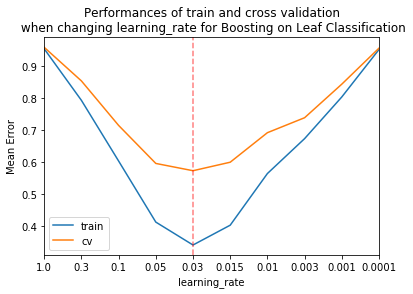

In [39]:
resBoost = gscvBoost.cv_results_
resBoostpd = pd.DataFrame(boost_paras)
resBoostpd["train"] = 1-np.array(resBoost['mean_train_score'])
resBoostpd["cv"] =1-np.array(resBoost['mean_test_score'])
resBoostpd.learning_rate = resBoostpd.learning_rate.astype(str)
resBoostpd=resBoostpd.set_index(["learning_rate"])

ax=resBoostpd.plot(title="Performances of train and cross validation\n when changing learning_rate for Boosting on Leaf Classification")
ax.set_ylabel("Mean Error")
idxmin = [i for i in range(resBoostpd.shape[0]) if resBoostpd.index[i] == resBoostpd.idxmin()['cv']]
ax.axvline(x=idxmin[0],color='r',ls='--',alpha=0.5)
plt.savefig("complex-error_Boostleaf_lr.png")

### best learning rate for AdaBoostClassifier on leaf dataset is 0.03

### Then tune "max_depth" for base_estimator

In [40]:
boost_Tree_Depth = pd.DataFrame({"max_depth":[2,6,10,20,30,100,300,1000]})
boost_Tree_Depth["validation_score"] = np.zeros(len(boost_Tree_Depth["max_depth"]))

val_score = []
for depth in boost_Tree_Depth["max_depth"]:

    boost1=AdaBoostClassifier(learning_rate = 0.03,base_estimator = DecisionTreeClassifier(max_depth = depth),random_state=88)
    scores = cross_val_score(boost1,X_train,y_train,cv = 4)
    val_score.append(scores.mean())

boost_Tree_Depth["validation_score"] = np.array(val_score)

boost_Tree_Depth.max_depth = boost_Tree_Depth.max_depth.astype(str)
boost_Tree_Depth.set_index("max_depth",inplace=True)

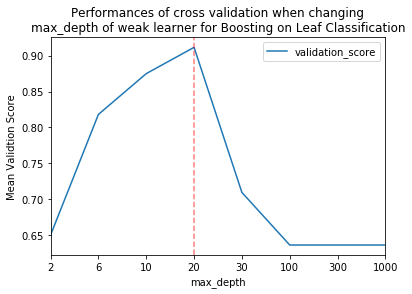

In [41]:

ax=boost_Tree_Depth.plot(title="Performances of cross validation when changing\nmax_depth of weak learner for Boosting on Leaf Classification")
ax.set_ylabel("Mean Validtion Score")
idxmax = [i for i in range(boost_Tree_Depth.shape[0]) if boost_Tree_Depth.index[i] == boost_Tree_Depth.idxmax()['validation_score']]
ax.axvline(x=idxmax[0],color='r',ls='--',alpha=0.5)
plt.savefig("complex-error_Boostleaf_maxDepth.png")

### Best max_depth value for weak learner is 20

### Then tune "n_estimators"

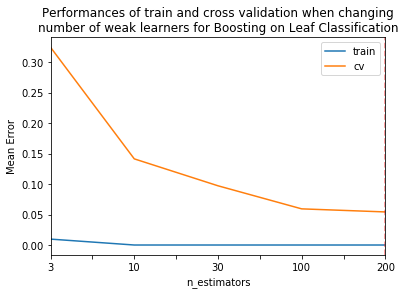

In [42]:
boost_paras={"n_estimators":[3,10,30,100,200]}
resBoostpd = pd.DataFrame(boost_paras)

boost2 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20),learning_rate=0.03,random_state=88)
gscvBoost2 = GridSearchCV(boost2,boost_paras,cv=4,n_jobs=2)
gscvBoost2.fit(X_train, y_train)
resBoost = gscvBoost2.cv_results_
resBoostpd["train"] = 1-np.array(resBoost['mean_train_score'])
resBoostpd["cv"] = 1-np.array(resBoost['mean_test_score'])

resBoostpd.n_estimators = resBoostpd.n_estimators.astype(str)
resBoostpd = resBoostpd.set_index(["n_estimators"])
ax=resBoostpd.plot(title="Performances of train and cross validation when changing\nnumber of weak learners for Boosting on Leaf Classification")
ax.set_ylabel("Mean Error")
idxmin = [i for i in range(resBoostpd.shape[0]) if resBoostpd.index[i] == resBoostpd.idxmin()['cv']]
ax.axvline(x=idxmin[0],color='r',ls='--',alpha=0.5)
plt.savefig("complex-error_Boostleaf_ne.png")

### From above analysis, the best AdaBoostClassifier on leaf dataset is:

In [43]:
best_boost = AdaBoostClassifier(n_estimators=200,base_estimator=DecisionTreeClassifier(max_depth=20),learning_rate=0.03,random_state=88)

## Next, I worked on neural network
### let's find best option for number of nodes in each layer and number of layers

In [44]:
mlp0 = MLPClassifier(solver = "sgd",random_state=10)
mlp_paras={"hidden_layer_sizes":[(i*10,j) for i in range(1,11) for j in [1,4,8,12,16,20,25,30,40]]}
gscvMLP0=GridSearchCV(mlp0, mlp_paras,cv=4,n_jobs=2)
gscvMLP0.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=10, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'hidden_layer_sizes': [(10, 1), (10, 4), (10, 8), (10, 12), (10, 16), (10, 20), (10, 25), (10, 30), (10, 40), (20, 1), (20, 4), (20, 8), (20, 12), (20, 16), (20, 20), (20, 25), (20, 30), (20, 40), (30, 1), (30, 4), (30, 8), (30, 12), (30, 16), (30, 20), (30, 25), (30, 30), (30, 40), (40,...0), (100, 1), (100, 4), (100, 8), (100, 12), (100, 16), (100, 20), (100, 25), (100, 30), (100, 40)]},
       pre_dispatch='2*n_jobs', refit=True, return_trai

The best classifier is:  MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 40), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=10, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


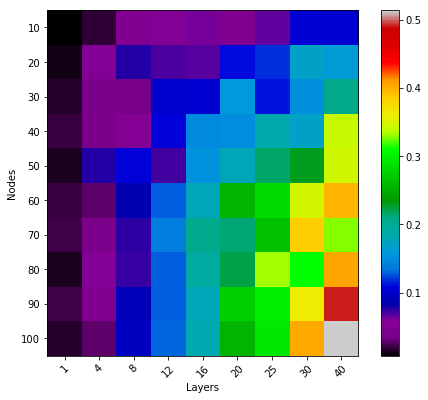

In [45]:
print("The best classifier is: ", gscvMLP0.best_estimator_)


score_dict = gscvMLP0.grid_scores_


scores = [x[1] for x in score_dict]
scores = np.array(scores).reshape(10,9)


pl.figure(figsize=(8, 6))
pl.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
pl.imshow(scores, interpolation='nearest', cmap=pl.cm.spectral)
pl.xlabel('Layers')
pl.ylabel('Nodes')
pl.colorbar()
pl.xticks(np.arange(9), [1,4,8,12,16,20,25,30,40], rotation=45)
pl.yticks(np.arange(10), [i*10 for i in range(1,11)])
pl.savefig("MLPleaf_hs.png")

### I selected hidden_layer_sizes=(100, 40) to continue the analysis
### Let's tune learning_rate_init

In [46]:
mlp = MLPClassifier(solver = "sgd",hidden_layer_sizes=[100,40],random_state=10)
mlp_paras = {"learning_rate_init":[30,10,3,1,0.3,0.1,0.03,0.01,0.003,0.001,0.0003,0.0001]}
gscvMLP=GridSearchCV(mlp, mlp_paras,cv=4,n_jobs=2)
gscvMLP.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[100, 40], learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=10, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'learning_rate_init': [30, 10, 3, 1, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001, 0.0003, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

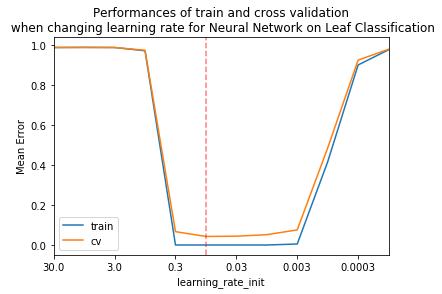

In [47]:
resMLP = gscvMLP.cv_results_
resMLPpd = pd.DataFrame(mlp_paras)
resMLPpd["train"] = 1-np.array(resMLP['mean_train_score'])
resMLPpd["cv"] =1-np.array(resMLP['mean_test_score'])
resMLPpd.learning_rate_init = resMLPpd.learning_rate_init.astype(str)
resMLPpd=resMLPpd.set_index(["learning_rate_init"])

ax=resMLPpd.plot(title="Performances of train and cross validation\n when changing learning rate for Neural Network on Leaf Classification")
ax.set_ylabel("Mean Error")
idxmin = [i for i in range(resMLPpd.shape[0]) if resMLPpd.index[i] == resMLPpd.idxmin()['cv']]
ax.axvline(x=idxmin[0],color='r',ls='--',alpha=0.5)
plt.savefig("complex-error_MLPleaf_lr.png")

### From above analysis, we'd better use learning rate between 0.3 to 0.003. Here 0.1 has best performance

### When we gridsearch best numbers of layers and neurons, I used 0.001, the default learning_rate_init, which gives very bad performances. Then I have to repeat the gridsearch with ideal learning_rate_init 0.1

In [48]:
mlp0 = MLPClassifier(solver = "sgd",random_state=10,learning_rate_init=0.1)
mlp_paras={"hidden_layer_sizes":[(i*10,j) for i in range(1,11) for j in [1,4,8,12,16,20,25,30,40]]}
gscvMLP0=GridSearchCV(mlp0, mlp_paras,cv=4,n_jobs=2)
gscvMLP0.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=10, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'hidden_layer_sizes': [(10, 1), (10, 4), (10, 8), (10, 12), (10, 16), (10, 20), (10, 25), (10, 30), (10, 40), (20, 1), (20, 4), (20, 8), (20, 12), (20, 16), (20, 20), (20, 25), (20, 30), (20, 40), (30, 1), (30, 4), (30, 8), (30, 12), (30, 16), (30, 20), (30, 25), (30, 30), (30, 40), (40,...0), (100, 1), (100, 4), (100, 8), (100, 12), (100, 16), (100, 20), (100, 25), (100, 30), (100, 40)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_

The best classifier is:  MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 40), learning_rate='constant',
       learning_rate_init=0.1, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=10, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


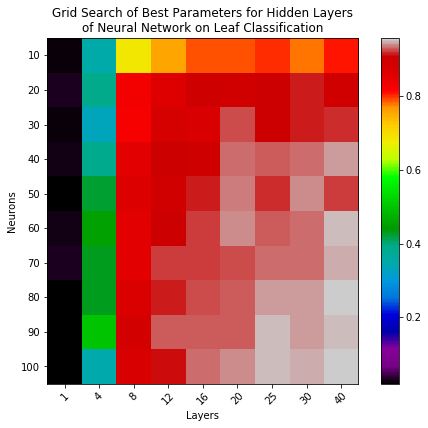

In [49]:
print("The best classifier is: ", gscvMLP0.best_estimator_)


score_dict = gscvMLP0.grid_scores_


scores = [x[1] for x in score_dict]
scores = np.array(scores).reshape(10,9)


pl.figure(figsize=(8, 6))
pl.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
pl.imshow(scores, interpolation='nearest', cmap=pl.cm.spectral)
pl.xlabel('Layers')
pl.ylabel('Neurons')
pl.colorbar()
pl.xticks(np.arange(9), [1,4,8,12,16,20,25,30,40], rotation=45)
pl.yticks(np.arange(10), [i*10 for i in range(1,11)])
pl.title("Grid Search of Best Parameters for Hidden Layers\nof Neural Network on Leaf Classification")
pl.savefig("MLPleaf_hs2.png")

### Still hidden_layer_sizes=[100,40] gives best performance
### Then Let's draw cross validation curves only for number of layers

In [50]:
mlp0 = MLPClassifier(solver = "sgd",random_state=10,learning_rate_init=0.1)
mlp_paras={"hidden_layer_sizes":[(100,j) for j in [4,8,12,16,20,25,30,40]]}
gscvMLP0=GridSearchCV(mlp0, mlp_paras,cv=4,n_jobs=2)
gscvMLP0.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=10, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'hidden_layer_sizes': [(100, 4), (100, 8), (100, 12), (100, 16), (100, 20), (100, 25), (100, 30), (100, 40)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

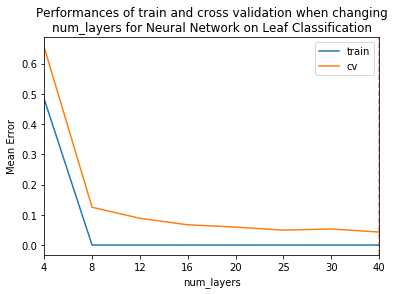

In [51]:
resMLP = gscvMLP0.cv_results_
resMLPpd = pd.DataFrame({"num_layers":[4,8,12,16,20,25,30,40]})
resMLPpd["train"] = 1-np.array(resMLP['mean_train_score'])
resMLPpd["cv"] =1-np.array(resMLP['mean_test_score'])
resMLPpd.num_layers = resMLPpd.num_layers.astype(str)
resMLPpd=resMLPpd.set_index(["num_layers"])

ax=resMLPpd.plot(title="Performances of train and cross validation when changing\nnum_layers for Neural Network on Leaf Classification")
ax.set_ylabel("Mean Error")
idxmin = [i for i in range(resMLPpd.shape[0]) if resMLPpd.index[i] == resMLPpd.idxmin()['cv']]
ax.axvline(x=idxmin[0],color='r',ls='--',alpha=0.5)
plt.savefig("complex-error_MLPleaf_layers.png")

### Then Let's draw cross validation curves only for number of neurons for each layer

In [52]:
mlp0 = MLPClassifier(solver = "sgd",random_state=10,learning_rate_init=0.1)
mlp_paras={"hidden_layer_sizes":[(i*10,40) for i in range(1,11)]}
gscvMLP01=GridSearchCV(mlp0, mlp_paras,cv=4,n_jobs=2)
gscvMLP01.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=10, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'hidden_layer_sizes': [(10, 40), (20, 40), (30, 40), (40, 40), (50, 40), (60, 40), (70, 40), (80, 40), (90, 40), (100, 40)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

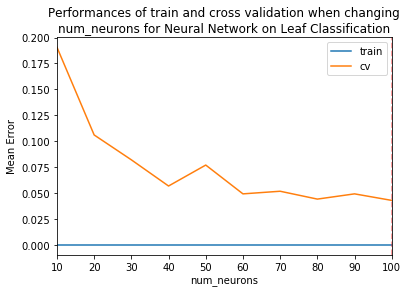

In [53]:
resMLP = gscvMLP01.cv_results_
resMLPpd = pd.DataFrame({"num_neurons":[i*10 for i in range(1,11)]})
resMLPpd["train"] = 1-np.array(resMLP['mean_train_score'])
resMLPpd["cv"] =1-np.array(resMLP['mean_test_score'])
resMLPpd.num_neurons = resMLPpd.num_neurons.astype(str)
resMLPpd=resMLPpd.set_index(["num_neurons"])

ax=resMLPpd.plot(title="Performances of train and cross validation when changing\nnum_neurons for Neural Network on Leaf Classification")
ax.set_ylabel("Mean Error")
idxmin = [i for i in range(resMLPpd.shape[0]) if resMLPpd.index[i] == resMLPpd.idxmin()['cv']]
ax.axvline(x=idxmin[0],color='r',ls='--',alpha=0.5)
plt.savefig("complex-error_MLPleaf_num_neurons.png")

### Then I build cross validation curve for parameter "alpha" which is for regularization

In [54]:
mlp1=MLPClassifier(solver = "sgd",hidden_layer_sizes=[100,40],learning_rate_init=0.1,random_state=10)
mlp_paras={"alpha":[10,3,1,0.3,0.1,0.03,0.01,0.003]}
gscvMLP1=GridSearchCV(mlp1, mlp_paras,cv=4,n_jobs=2)
gscvMLP1.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[100, 40], learning_rate='constant',
       learning_rate_init=0.1, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=10, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'alpha': [10, 3, 1, 0.3, 0.1, 0.03, 0.01, 0.003]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

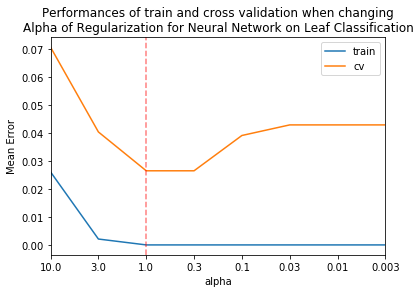

In [55]:
resMLP = gscvMLP1.cv_results_
resMLPpd = pd.DataFrame(mlp_paras)
resMLPpd["train"] = 1-np.array(resMLP['mean_train_score'])
resMLPpd["cv"] =1-np.array(resMLP['mean_test_score'])
resMLPpd.alpha = resMLPpd.alpha.astype(str)
resMLPpd=resMLPpd.set_index(["alpha"])

ax=resMLPpd.plot(title="Performances of train and cross validation when changing\nAlpha of Regularization for Neural Network on Leaf Classification")
ax.set_ylabel("Mean Error")
idxmin = [i for i in range(resMLPpd.shape[0]) if resMLPpd.index[i] == resMLPpd.idxmin()['cv']]
ax.axvline(x=idxmin[0],color='r',ls='--',alpha=0.5)
plt.savefig("complex-error_MLPleaf_alpha.png")

### From above analysis, I chose 1 as best alpha I can pick.

### Then let's tune momentum

In [56]:
mlp2=MLPClassifier(solver = "sgd",hidden_layer_sizes=[100,40],learning_rate_init=0.1,random_state=10,alpha=1)
mlp_paras={"momentum":[0.99,0.97,0.95,0.93,0.92,0.91,0.9,0.89,0.88,0.85,0.8,0.7]}
gscvMLP2=GridSearchCV(mlp2, mlp_paras,cv=4,n_jobs=2)
gscvMLP2.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[100, 40], learning_rate='constant',
       learning_rate_init=0.1, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=10, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'momentum': [0.99, 0.97, 0.95, 0.93, 0.92, 0.91, 0.9, 0.89, 0.88, 0.85, 0.8, 0.7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

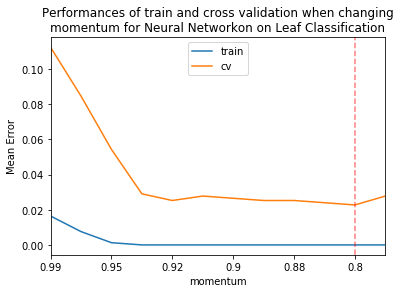

In [57]:
resMLP = gscvMLP2.cv_results_
resMLPpd = pd.DataFrame(mlp_paras)
resMLPpd["train"] = 1-np.array(resMLP['mean_train_score'])
resMLPpd["cv"] =1-np.array(resMLP['mean_test_score'])
resMLPpd.momentum = resMLPpd.momentum.astype(str)
resMLPpd=resMLPpd.set_index(["momentum"])

ax=resMLPpd.plot(title="Performances of train and cross validation when changing\nmomentum for Neural Networkon on Leaf Classification")
ax.set_ylabel("Mean Error")
idxmin = [i for i in range(resMLPpd.shape[0]) if resMLPpd.index[i] == resMLPpd.idxmin()['cv']]
ax.axvline(x=idxmin[0],color='r',ls='--',alpha=0.5)
plt.savefig("complex-error_MLPleaf_momentum.png")

### The best momentum value I can pick is 0.8

### Then I try to tune max_iter

In [58]:
mlp3=MLPClassifier(solver = "sgd",hidden_layer_sizes=[100,40],
                   learning_rate_init=0.1,random_state=10,
                   alpha=1,momentum = 0.8)
mlp_paras={"max_iter":[20,50,100,150,200,300,400]}
gscvMLP3=GridSearchCV(mlp3, mlp_paras,cv=4,n_jobs=2)
gscvMLP3.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[100, 40], learning_rate='constant',
       learning_rate_init=0.1, max_iter=200, momentum=0.8,
       nesterovs_momentum=True, power_t=0.5, random_state=10, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'max_iter': [20, 50, 100, 150, 200, 300, 400]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

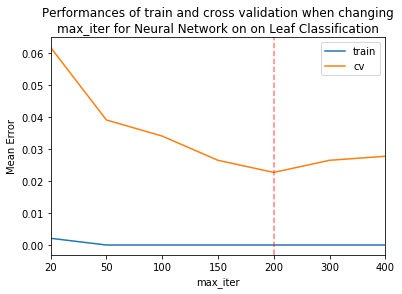

In [59]:
resMLP = gscvMLP3.cv_results_
resMLPpd = pd.DataFrame(mlp_paras)
resMLPpd["train"] = 1-np.array(resMLP['mean_train_score'])
resMLPpd["cv"] =1-np.array(resMLP['mean_test_score'])
resMLPpd.max_iter = resMLPpd.max_iter.astype(str)
resMLPpd=resMLPpd.set_index(["max_iter"])

ax=resMLPpd.plot(title="Performances of train and cross validation when changing\nmax_iter for Neural Network on on Leaf Classification")
ax.set_ylabel("Mean Error")
idxmin = [i for i in range(resMLPpd.shape[0]) if resMLPpd.index[i] == resMLPpd.idxmin()['cv']]
ax.axvline(x=idxmin[0],color='r',ls='--',alpha=0.5)
plt.savefig("complex-error_MLPleaf_miter.png")

### from above analysis, best  MLPClassifier indentified is :

In [60]:
best_mlp = MLPClassifier(solver = "sgd",hidden_layer_sizes=[100,40],
                   learning_rate_init=0.1,random_state=10,
                   alpha=1,momentum = 0.8,max_iter=200)

## The following are my best classifiers obtained from parameter optimization by cross validation

In [61]:
best_classifiers = [
    best_KNN, #KNN
    best_SVC1,#SVM with rbf kernel
    best_SVC2,#SVM with linear kernel
    best_mlp,#ANN
    best_tree,#Decision Tree
    best_boost,#Boosting
    ]

In [62]:
log_cols=["Classifier", "Train_Accuracy","Test_Accuracy", "Training_time", "Prediction_time_on_test"]
final_performance = pd.DataFrame(columns = log_cols)
repeat = 4

for clf in best_classifiers:
    name = clf.__class__.__name__
    print("="*30)
    if name  == "SVC":
        name += clf.kernel
    print(name)

    train_acc = []
    test_acc = []
    training_time = []
    prediction_time_on_test  = []
    
    for _ in range(repeat):
        
        start1 = time.time()
        clf.fit(X_train, y_train)
        training_time.append(time.time() - start1)
        
        train_predictions = clf.predict(X_train)
        train_acc.append(accuracy_score(y_train, train_predictions))

        start2 = time.time()
        test_predictions = clf.predict(X_test)
        prediction_time_on_test.append(time.time() - start2)
        
        test_acc.append(accuracy_score(y_test, test_predictions))


    log_entry = pd.DataFrame([[name, np.mean(train_acc)*100, np.mean(test_acc)*100, np.mean(training_time), np.mean(prediction_time_on_test)]], columns=log_cols)
    final_performance = final_performance.append(log_entry)
final_performance = final_performance.reset_index(drop=True)
print("="*30)

KNeighborsClassifier
SVCrbf
SVClinear
MLPClassifier
DecisionTreeClassifier
AdaBoostClassifier


In [63]:
final_performance

,Classifier,Train_Accuracy,Test_Accuracy,Training_time,Prediction_time_on_test
0,KNeighborsClassifier,100.000000,97.979798,0.010942,0.073733
1,SVCrbf,100.000000,98.484848,0.357882,0.046365
2,SVClinear,100.000000,98.484848,0.196127,0.046885
3,MLPClassifier,100.000000,98.484848,2.747766,0.000250
4,DecisionTreeClassifier,98.358586,63.131313,0.734470,0.000000
5,AdaBoostClassifier,100.000000,97.474747,48.134114,0.112400


### The first SVC is for rbf kernel, and the second is for linear. Linear SVC was trained faster than rbf. 

## Plot Learning Curves

In [64]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Error rate")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_error = 1-train_scores
    test_error = 1-test_scores
    train_error_mean = np.mean(train_error, axis=1)
    train_error_std = np.std(train_error, axis=1)
    test_error_mean = np.mean(test_error, axis=1)
    test_error_std = np.std(test_error, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_error_mean - train_error_std,
                     train_error_mean + train_error_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_error_mean - test_error_std,
                     test_error_mean + test_error_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_error_mean, 'o-', color="r",
             label="Training error rate")
    plt.plot(train_sizes, test_error_mean, 'o-', color="g",
             label="Cross-validation error rate")

    plt.legend(loc="best")
    return plt

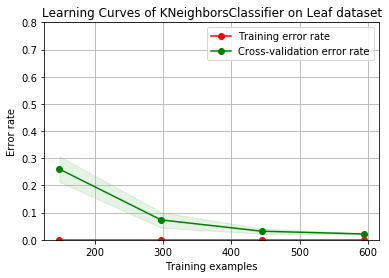

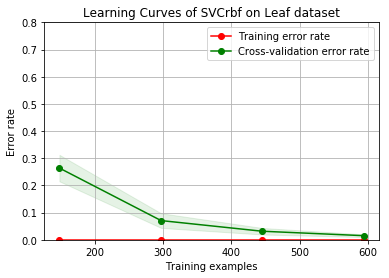

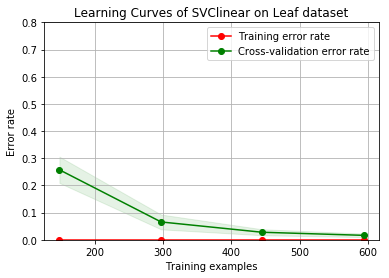

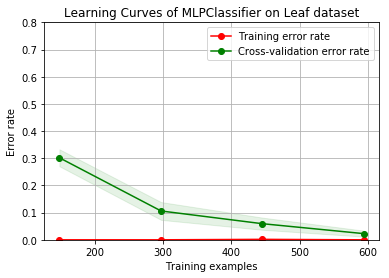

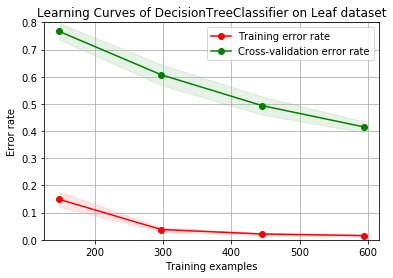

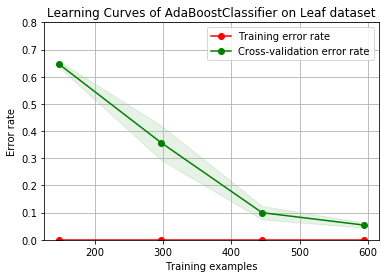

In [65]:
for clf in best_classifiers:
    name = clf.__class__.__name__
    if name  == "SVC":
        name += clf.kernel
    title = "Learning Curves of {} on Leaf dataset".format(name)

    plot_learning_curve(clf, title, X_train, y_train, ylim=(0, 0.8),train_sizes=np.linspace(.25, 1.0, 4), cv=4, n_jobs=4)
    pic_name = "learning_curve_leaf_{}.png".format(name)
    plt.savefig(pic_name)
plt.show()